# PS3
    Student: Fiona Fan
    Instructor: Rick Evans
    MACS 30100 Winter 2018 
    

In [448]:
# Import packages and load the data
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
import pandas as pd
# import numpy.linalg as lin
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

incomes= np.loadtxt('incomes.txt', delimiter=',', unpack=True)


## 1a)

<IPython.core.display.Javascript object>


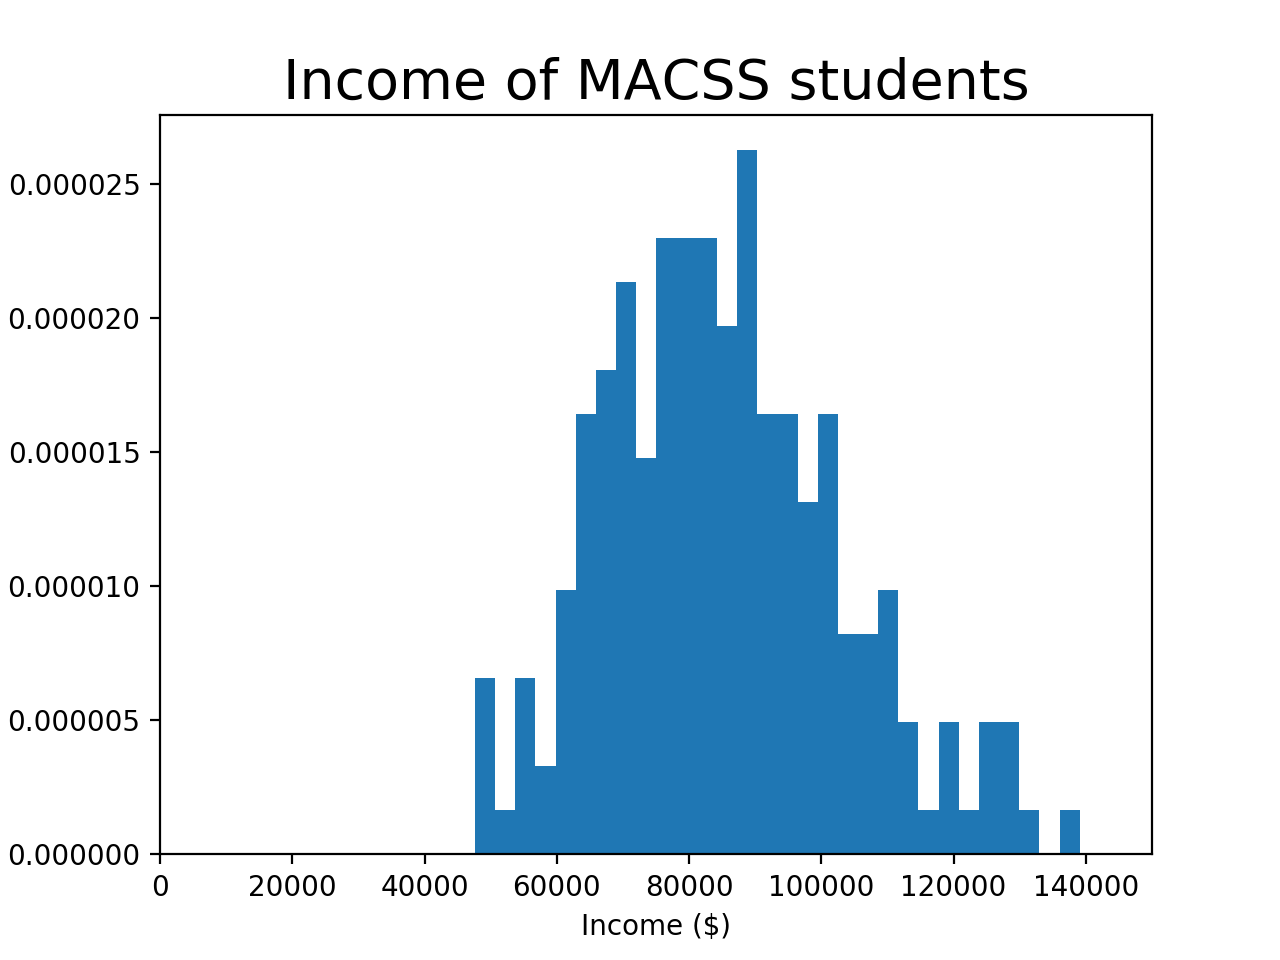

(0, 150000)

In [449]:
fig,ax = plt.subplots()
ax.hist(incomes, 30, normed=True)
ax.set_title('Income of MACSS students', fontsize=20)
ax.set_xlabel(r'Income (\$)')
ax.set_ylabel('Percent of observations')
ax.set_xlim([0,150000])

## 1b)

In [450]:
def log_norm_pdf(sigma, mu, x):
    pdf_vals    = (1/(x * sigma * np.sqrt(2 * np.pi))) *\
                    np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))    
    return pdf_vals


In [451]:
def plot(incomes, mu, sigma, data_moments, model_moments, crit_val):
    
    if len(data_moments)==2:
        mean, std = model_moments
        mean_d, std_d = data_moments
    else:
        bottom_d, middle_d, up_d = data_moments
        bottom_m, middle_m, up_m = model_moments
    
    
    fig,ax = plt.subplots()
    ax.hist(incomes, 30, normed=True)
    ax.plot()
    ax.set_title('Income of MACSS students', fontsize=20)
    ax.set_xlabel(r'Income (\$)')
    ax.set_ylabel('Percent of observations')
    ax.set_xlim([0,150000])

    grain =1000
    dist_pts = np.linspace(0.01, 150000,grain)
    gmm_incomes = log_norm_pdf(sigma, mu, dist_pts)
#     mean_gmm, sigma_gmm = model_moments(mu_GMM, sd_GMM)
    ax.plot(dist_pts, gmm_incomes ,linewidth=2, color='g', label=f'$\mu$={mu:.2f},$\sigma$={sigma:.2f}')
    ax.grid(b=True, which='major', color='0.65', linestyle='-')
    ax.legend(loc='upper left')

    print(f'The GMM estimated mu and sigma of lognormal distribution is {mu:.2f} and {sigma:.2f}')
    #criterion((mu_GMM, sd_GMM),incomes,np.eye(2))
    print(f'The value of the criterion function at GMM is {crit_val}')
    if len(data_moments)==2:
        print (f'The data moments are: mean {mean_d:.2f}, sigma {std_d:.2f}')
        print (f'The model memtns are: mean {mean:.2f}, sigma {std:.2f}')
    else:
        print (f'The data moments are: bottom {bottom_d:.5f}, middle {middle_d:.5f}, top {up_d:.5f}')
        print (f'The model memtns are: bottom {bottom_m:.5f}, middle {middle_m:.5f}, top {up_m:.5f}')
#     print (f'The data moments are ')
    return ax

In [452]:
def data_moments(x):
    mean = x.mean()
    sd = np.std(x)
    return mean, sd

def model_moments(mu, sd):
    #below is the analytical integral of log normal distribution
    var = sd**2
    mean = np.exp(mu + (var/2))
    sd = np.sqrt((np.exp(var)-1)*(np.exp(2*mu + var)))      

    return mean, sd

def errs(x, mu, sd):
    dm = np.array(data_moments(x))
    mm = np.array(model_moments(mu, sd))
    return ((dm - mm)/dm)

def criterion(params, *args):
    mu, sd = params
    x, W = args 
    err = errs(x, mu, sd)
    return np.dot(np.dot(err.T, W), err)

In [453]:
mu = 0.1 
sd = 0.1
mu_d = incomes.mean()
sd_d = np.std(incomes)
params = np.array([mu, sd])
res = opt.minimize(criterion, params, args=(incomes, np.eye(2)), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))

<IPython.core.display.Javascript object>


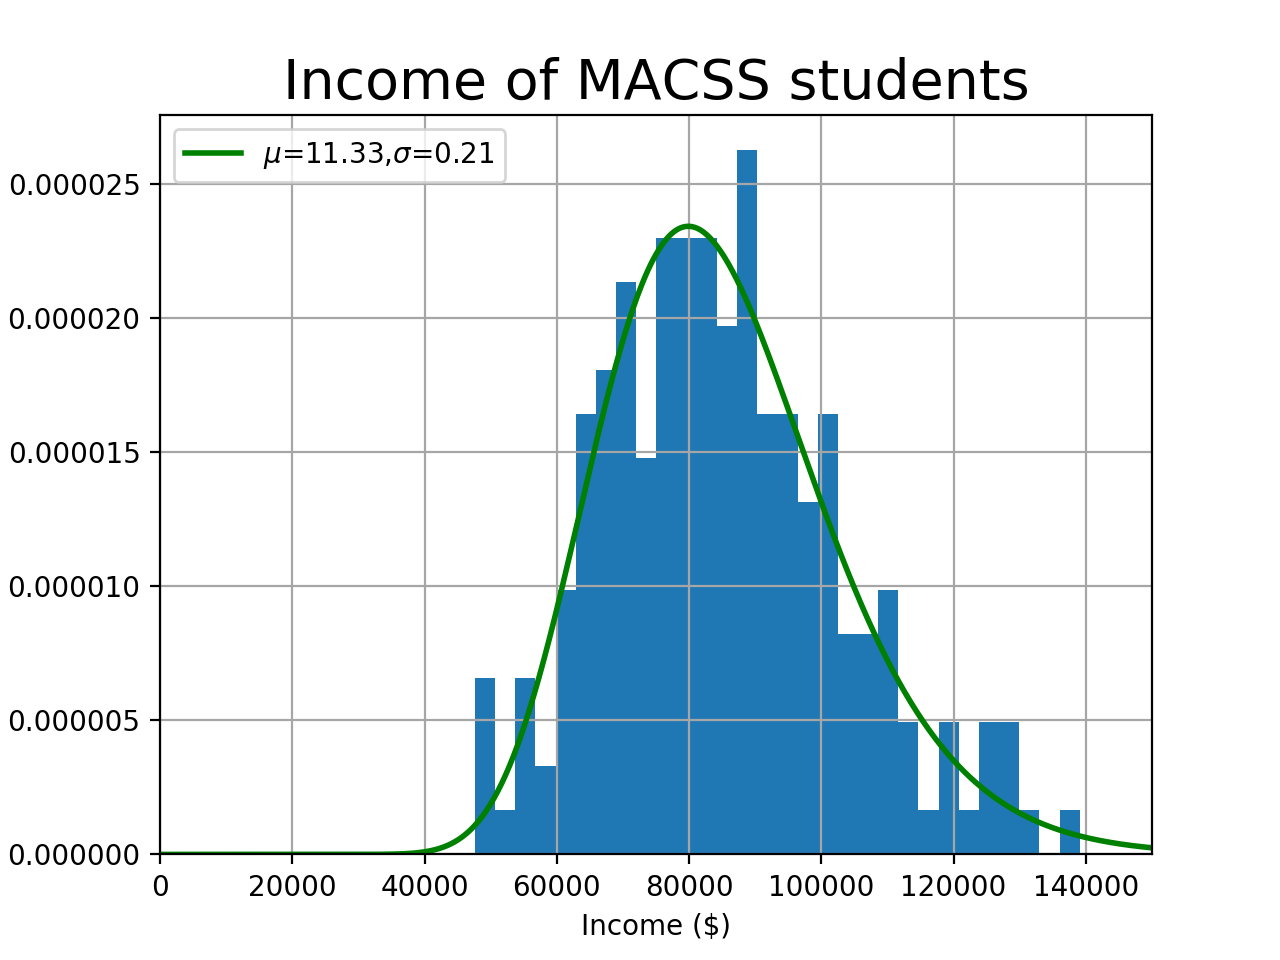

The GMM estimated mu and sigma of lognormal distribution is 11.33 and 0.21
The value of the criterion function at GMM is 1.0855333832707681e-13
The data moments are: mean 85276.82, sigma 17992.54
The model memtns are: mean 85276.83, sigma 17992.54


In [454]:
mu_GMM,sd_GMM =  res.x
crit_val = criterion((mu_GMM, sd_GMM),incomes,np.eye(2))
mean_gmm, sigma_gmm = model_moments(mu_GMM, sd_GMM)
ax = plot (incomes, mu_GMM, sd_GMM, data_moments(incomes), model_moments(mu_GMM, sd_GMM), crit_val)


## 1c)

In [455]:
err1 = errs(incomes, mu_GMM,sd_GMM).reshape(2,1)
# print (err1)
Omega = np.dot(err1, err1.T)/ len(incomes)
# print (VCV)
W= lin.pinv(np.matrix(Omega))
# W = lin.qr(np.matrix(Omega))[0]
# print (W)
params = np.array([mu_GMM,sd_GMM])
results = opt.minimize(criterion, params, args=(incomes, W),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
print(results)
mu_GMM_2,sd_GMM_2 =  results.x

gmm_incomes_2 = log_norm_pdf(sd_GMM_2, mu_GMM_2, dist_pts)
mean_gmm_2, sigma_gmm_2 = model_moments(mu_GMM_2, sd_GMM_2)

crit_val_2 = criterion((mu_GMM_2, sd_GMM_2),incomes,W)


      fun: matrix([[  4.76038942e-05]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.31119993e+07,   4.64820480e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 7
   status: 0
  success: True
        x: array([ 11.33188097,   0.20869664])


<IPython.core.display.Javascript object>


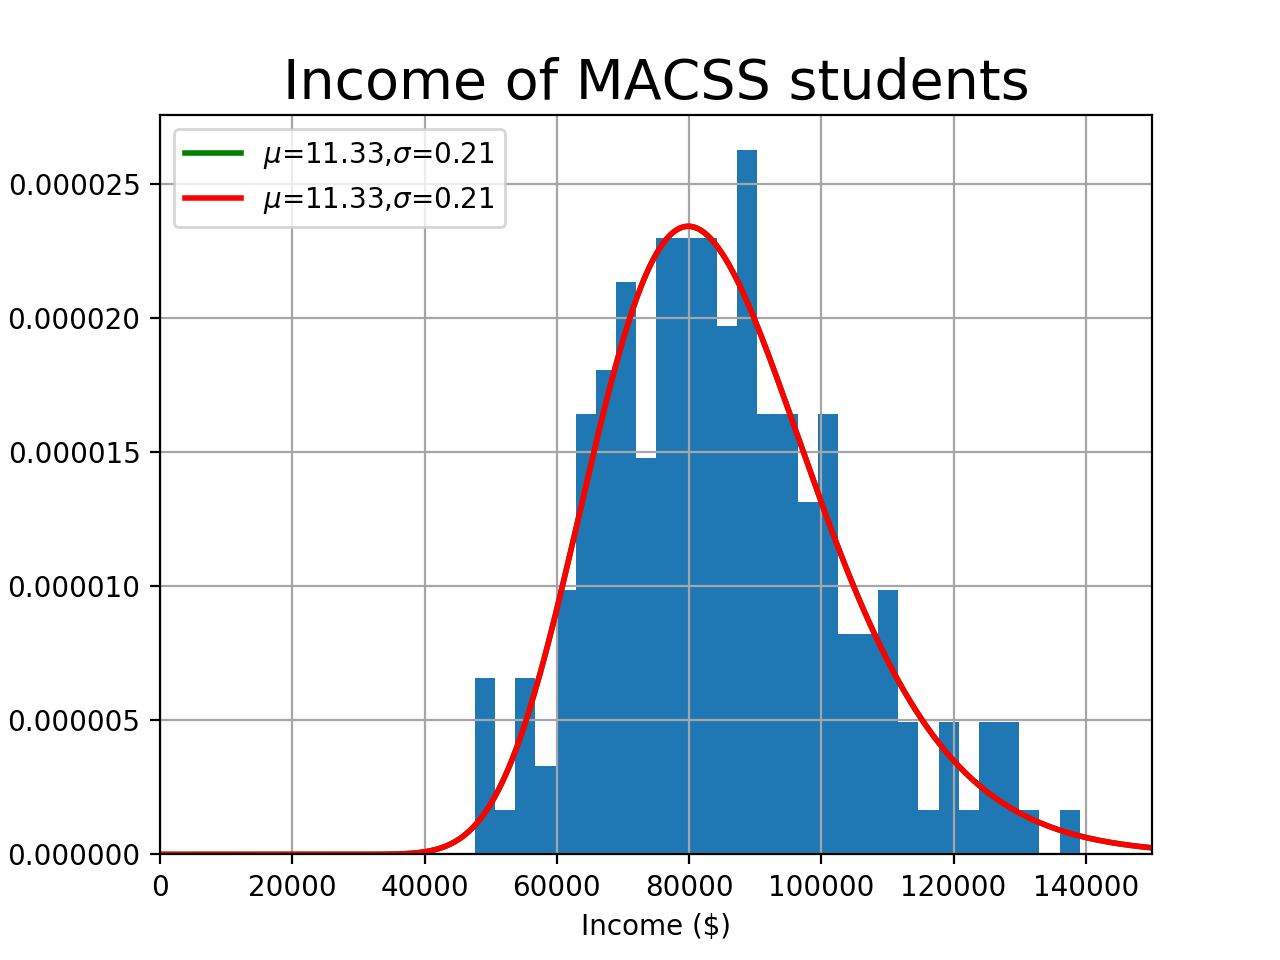

The GMM estimated mu and sigma of lognormal distribution is 11.33 and 0.21
The GMM estimated mean is 85276.83, sigma is 17992.54.
The data mean is 85276.82, sigma is 17992.54.
The value of the criterion function at GMM is [[  4.76038942e-05]]


In [456]:
# plot(incomes, mu_GMM_2,sd_GMM_2, data_moments(incomes),model_moments(mu_GMM_2, sd_GMM_2), crit_val_2)
fig,ax = plt.subplots()
ax.hist(incomes, 30, normed=True)
ax.set_title('Income of MACSS students', fontsize=20)
ax.set_xlabel(r'Income (\$)')
ax.set_ylabel('Percent of observations')
ax.set_xlim([0,150000])

ax.plot(dist_pts, gmm_incomes ,linewidth=2, color='g', label=f'$\mu$={mu_GMM:.2f},$\sigma$={sd_GMM:.2f}')
ax.plot(dist_pts, gmm_incomes_2 ,linewidth=2, color='r', label=f'$\mu$={mu_GMM_2:.2f},$\sigma$={sd_GMM_2:.2f}')

ax.grid(b=True, which='major', color='0.65', linestyle='-')
ax.legend(loc='upper left')


print(f'The GMM estimated mu and sigma of lognormal distribution is {mu_GMM_2:.2f} and {sd_GMM_2:.2f}')
print (f'The GMM estimated mean is {mean_gmm_2:.2f}, sigma is {sigma_gmm_2:.2f}.')
print (f'The data mean is {mu_d:.2f}, sigma is {sd_d:.2f}.')
#criterion((mu_GMM, sd_GMM),incomes,np.eye(2))
print(f'The value of the criterion function at GMM is {criterion((mu_GMM_2, sd_GMM_2),incomes,W)}')

## 1d)

In [457]:
def data_moments_3(x):
    x=np.array(x)
    N = len(x)
    bottom = sum(x < 75000)/N
    middle = np.all((x >= 75000, x <= 100000), axis = 0).sum()/N
    up = sum(x > 100000)/N
    
    return bottom, middle, up

def errs_3(x, mu, sd):
    dm = np.array(data_moments_3(x))
    mm = np.array(model_moments_3(mu, sd))
    return ((dm - mm)/dm)

def criterion_3(params, *args):
    mu, sd = params
    x, W = args 
    err = errs_3(x, mu, sd)
    return err.T @ W @err

def model_moments_3(mu, sd):
    fx = lambda x : log_norm_pdf(sd,mu,x)
    bottom = intgr.quad(fx,1e-10, 75000)[0]
    middle = intgr.quad(fx,1e-10, 100000)[0] - bottom
    up = 1- intgr.quad(fx,1e-10, 100000)[0]

    return bottom, middle, up


In [458]:
params = np.array([mu_GMM,sd_GMM])
results_3 = opt.minimize(criterion_3, params, args=(incomes, np.eye(3)), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))

In [459]:
results_3.x

array([ 11.33568133,   0.21059845])

<IPython.core.display.Javascript object>


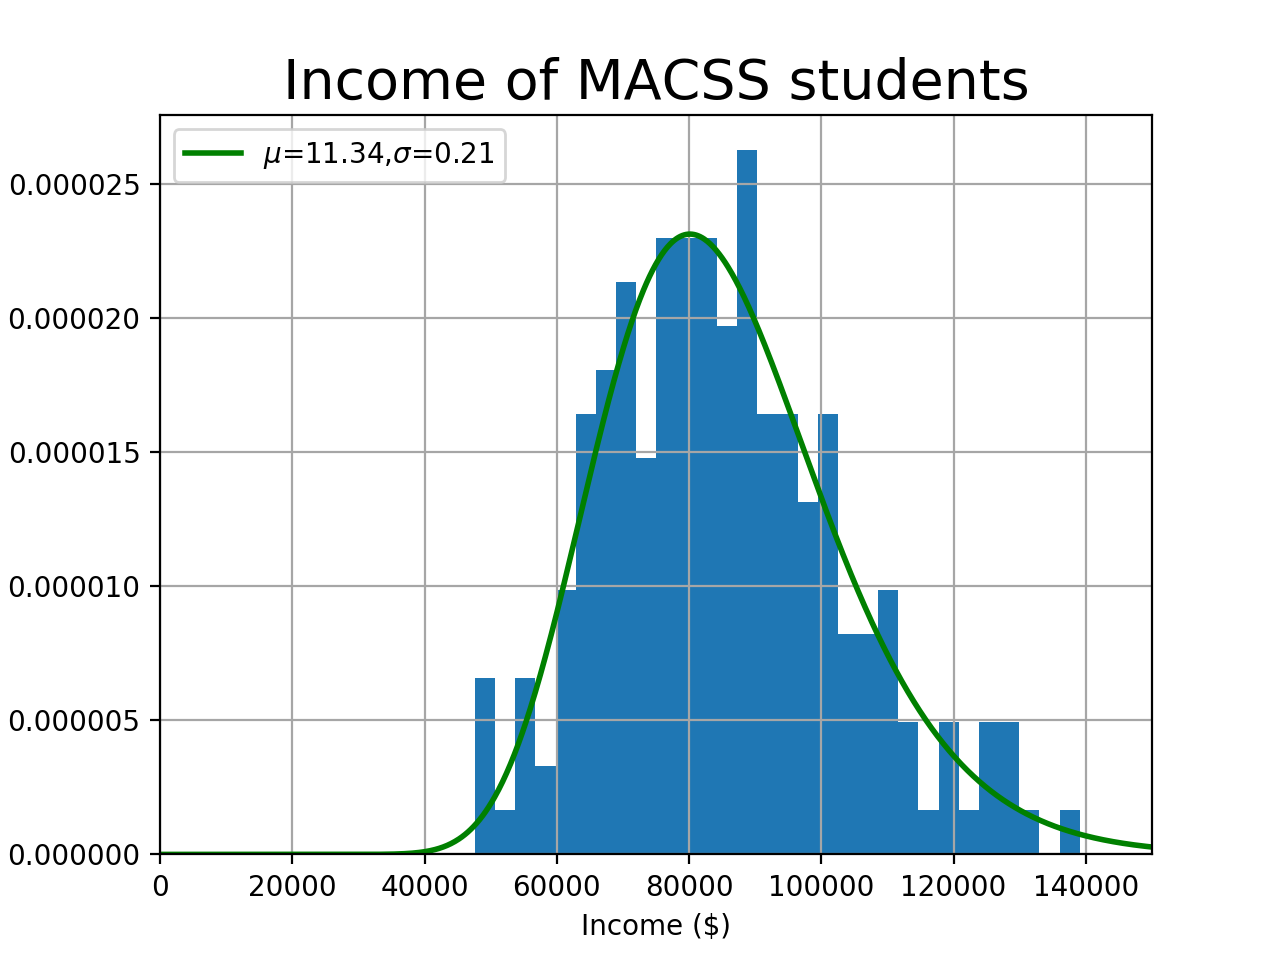

The GMM estimated mu and sigma of lognormal distribution is 11.34 and 0.21
The value of the criterion function at GMM is 2.4903430999818834e-15
The data moments are: bottom 0.30000, middle 0.50000, top 0.20000
The model memtns are: bottom 0.30000, middle 0.50000, top 0.20000


In [460]:
mu_GMM_3,sd_GMM_3 =  results_3.x

gmm_incomes_3 = log_norm_pdf(sd_GMM_3, mu_GMM_3, dist_pts)
bottom, middle, up = model_moments_3(mu_GMM_3, sd_GMM_3)

crit_val_3 = criterion_3((mu_GMM_3, sd_GMM_3),incomes,np.eye(3))
plot (incomes, mu_GMM_3,sd_GMM_3, data_moments_3(incomes),model_moments_3(mu_GMM_3, sd_GMM_3), crit_val_3)

## 1e)

In [461]:
err3 = errs_3(incomes, mu_GMM_3,sd_GMM_3).reshape(3,1)
Omega3 = np.dot(err3, err3.T)/ len(incomes)
W3= lin.pinv(np.matrix(Omega3))
print (W3)
params3 = np.array([mu_GMM_3,sd_GMM_3])
results_e = opt.minimize(criterion_3, params3, args=(incomes, W3),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))

[[  5.39388609e+15   4.59187243e+15  -1.95705103e+16]
 [  4.59187243e+15   3.90910969e+15  -1.66605830e+16]
 [ -1.95705103e+16  -1.66605830e+16   7.10072233e+16]]


In [462]:
print (err3)
mu_GMM_e,sd_GMM_e =  results_e.x

gmm_incomes_e = log_norm_pdf(sd_GMM_e, mu_GMM_e, dist_pts)
bottom_e, middle_e, up_e = model_moments_3(mu_GMM_e, sd_GMM_e)
bottom_d, middle_d, up_d = data_moments_3(incomes)

crit_val_e = criterion_3((mu_GMM_e, sd_GMM_e),incomes,W3)
print(crit_val_e)

[[ -1.29328748e-08]
 [ -1.10098934e-08]
 [  4.69240460e-08]]
[[ 84.3835515]]


<IPython.core.display.Javascript object>


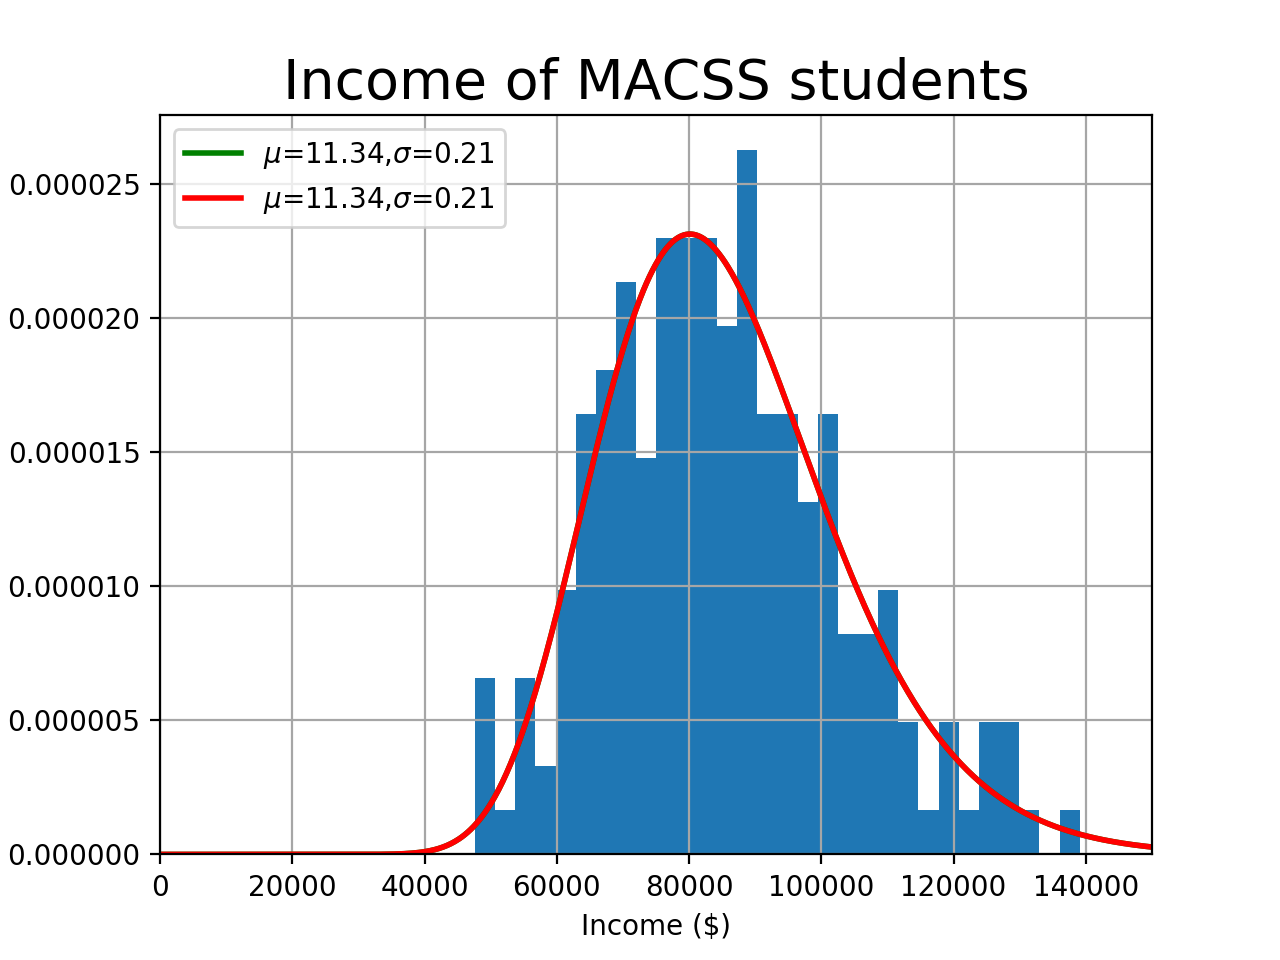

The GMM estimated mu and sigma of lognormal distribution is 11.34 and 0.21
The value of the criterion function at GMM is [[ 84.3835515]]
The data moments are: bottom 0.30000, middle 0.50000, top 0.20000
The model memtns are: bottom 0.30000, middle 0.50000, top 0.20000


In [463]:
# results_e

fig,ax = plt.subplots()
ax.hist(incomes, 30, normed=True)
ax.plot()
ax.set_title('Income of MACSS students', fontsize=20)
ax.set_xlabel(r'Income (\$)')
ax.set_ylabel('Percent of observations')
ax.set_xlim([0,150000])

grain =1000
dist_pts = np.linspace(0.01, 150000,grain)
# gmm_incomes = log_norm_pdf(sigma, mu, dist_pts)
#     mean_gmm, sigma_gmm = model_moments(mu_GMM, sd_GMM)
ax.plot(dist_pts, gmm_incomes_3 ,linewidth=2, color='g', label=f'$\mu$={mu_GMM_3:.2f},$\sigma$={sd_GMM_3:.2f}')
ax.plot(dist_pts, gmm_incomes_e ,linewidth=2, color='r', label=f'$\mu$={mu_GMM_e:.2f},$\sigma$={sd_GMM_e:.2f}')

ax.grid(b=True, which='major', color='0.65', linestyle='-')
ax.legend(loc='upper left')

print(f'The GMM estimated mu and sigma of lognormal distribution is {mu_GMM_e:.2f} and {sd_GMM_e:.2f}')
print(f'The value of the criterion function at GMM is {results_e.fun}')
print (f'The data moments are: bottom {bottom_d:.5f}, middle {middle_d:.5f}, top {up_d:.5f}')
print (f'The model memtns are: bottom {bottom_e:.5f}, middle {middle_e:.5f}, top {up_e:.5f}')

## 1f)

All four estimates are very similar in shape. The estimates in 1d) has a the lowest criterion values, so I would choose 1d) as the best estimates. However, the method in 1a) is the most robust to initial values, and is good for initial estimations. 

## 2a)

In [379]:
data =  pd.read_csv('sick.txt')
N = len(data)

In [436]:
def reg_data_moments(df):
    return df.sick.values

def reg_model_moments(df, beta_vec):
    X = df.values[:,1:]
    X = np.concatenate((np.ones((len(X),1)),X), axis = 1)
    return X @ beta_vec

def reg_err(df, beta_vec):
    err = reg_model_moments(df, beta_vec) - reg_data_moments(df)
    return np.square(err).sum()

def reg_crit(params, *args):
    beta_vec = params
    df,= args
    return reg_err(df,beta_vec)

In [437]:

betas_init = np.array([1,1,1,1]).T
reg_result = opt.minimize(reg_crit, betas_init, args=data, method='L-BFGS-B', bounds=((None, None), (None, None), (None, None), (None, None)))

In [447]:
b0,b1,b2,b3 = reg_result.x
print(f'The betas are b0:{b0:.2f}; b1:{b1:.2f}; b2:{b2:.2f}; b3{b3:.2f}')
print (f'The criterion value is: {reg_result.fun}')


The betas are b0:0.25; b1:0.01; b2:0.40; b3-0.01
The criterion value is: 0.0018212898261136543
